In [1]:
from caveclient import CAVEclient
from cloudvolume import CloudVolume, VolumeCutout
import numpy as np
import matplotlib.pyplot as plt
import intern

%cd ..
from membrane_detection import membranes
from agents import data_loader
import arch_state
%cd -

/home/luzhou/campfire
/home/luzhou/campfire/orphan_extension


In [2]:
# client = CAVEclient('minnie65_phase3_v1')

em = CloudVolume('s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg', 
                use_https=True, mip=0, parallel=True, fill_missing=True,
                progress=True)

em = em[51000:52000,51000:52000,15000:15200]
# em.viewer()

# endpoint = np.divide([float(p) for p in endpoint], resolution).astype('int')
# bound  = (endpoint[0] - radius[0], 
#         endpoint[0] + radius[0],
#         endpoint[1] - radius[1],
#         endpoint[1] + radius[1],
#         endpoint[2] - radius[2],
#         endpoint[2] + radius[2])

# em = np.squeeze(data_loader.get_em(*bound))


Decompressing: 100%|██████████| 567/567 [00:00<00:00, 1850.64it/s]


In [ ]:
print(np.count_nonzero(em))

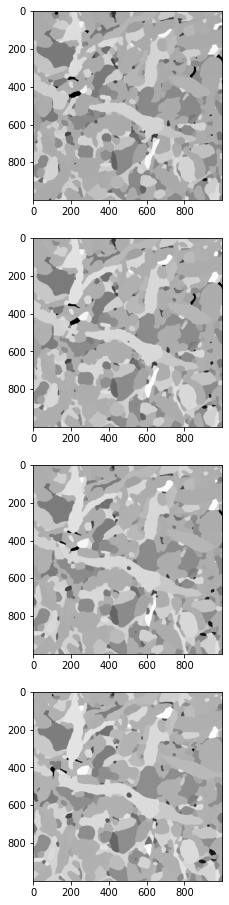

In [3]:
fig, ax = plt.subplots(4, 1, figsize=(4,16))
ax[0].imshow(em[:,:,0], cmap='gray')
ax[1].imshow(em[:,:,1], cmap='gray')
ax[2].imshow(em[:,:,2], cmap='gray')
ax[3].imshow(em[:,:,3], cmap='gray')
plt.show()

In [8]:
# TEST COL
cave_client = CAVEclient('minnie65_phase3_v1')
t = cave_client.chunkedgraph.segmentation_info

{'app': {'supported_api_versions': [0, 1]},
 'chunks_start_at_voxel_offset': True,
 'data_dir': 'gs://minnie65_pcg/ws',
 'data_type': 'uint64',
 'graph': {'bounding_box': [2048, 2048, 512],
  'chunk_size': [256, 256, 512],
  'cv_mip': 0,
  'n_bits_for_layer_id': 8,
  'n_layers': 12,
  'spatial_bit_masks': {'1': 10,
   '2': 10,
   '3': 9,
   '4': 8,
   '5': 7,
   '6': 6,
   '7': 5,
   '8': 4,
   '9': 3,
   '10': 2,
   '11': 1,
   '12': 1}},
 'mesh': 'graphene_meshes_minnie3_v1',
 'mesh_metadata': {'uniform_draco_grid_size': 21,
  'unsharded_mesh_dir': 'dynamic'},
 'num_channels': 1,
 'scales': [{'chunk_sizes': [[256, 256, 32]],
   'compressed_segmentation_block_size': [8, 8, 8],
   'encoding': 'compressed_segmentation',
   'key': '8_8_40',
   'locked': True,
   'resolution': [8, 8, 40],
   'size': [192424, 131051, 13008],
   'voxel_offset': [26385, 30308, 14850]},
  {'chunk_sizes': [[256, 256, 32]],
   'compressed_segmentation_block_size': [8, 8, 8],
   'encoding': 'compressed_segmentat

In [93]:
em = intern.array("bossdb://microns/pinky100/em")
data = em[824:830, 56298:57322, 79190:80214]


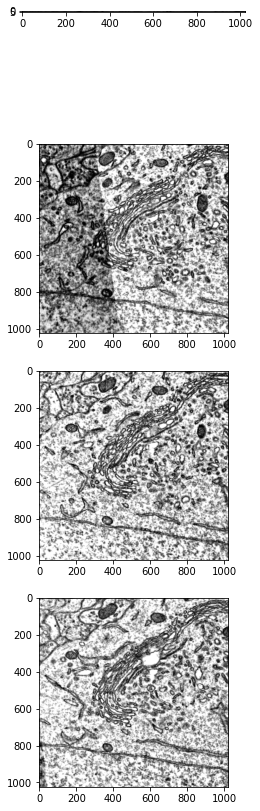

In [94]:
fig, ax = plt.subplots(4, 1, figsize=(4,16))
ax[0].imshow(data[:,:,0], cmap='gray')
ax[1].imshow(data[1,:,:], cmap='gray')
ax[2].imshow(data[2,:,:], cmap='gray')
ax[3].imshow(data[3,:,:], cmap='gray')
plt.show()